# Instructions on Running the Code
1. Create a new python environment
2. Install the dependencies from requirements.txt
3. Change the filename and folder to the input image location
4. Use prompt by either passing it through GPT 4 to get good prompting suggestions or follow the report to use appropriate prompts
5. Make sure the prompt includes the tokens of objects that has to remain unaltered and tokens of objects that need to be changed
6. Play around with the hyperparameters with the suggestions provided
7. If you think the image is over-editing or a completely new image is formed, decrease the strength
8. If you want to guide the image generation more towards the prompt description, increase the guidance scale


In [1]:
import torch
from ImgEditAsImgGen import ImgEditingAsImgGen
%load_ext autoreload
%autoreload 2
from PIL import Image

/home/ubuntu/anaconda3/envs/image_edit/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
model_id = 'runwayml/stable-diffusion-v1-5'

# load model and scheduler
ldm = ImgEditingAsImgGen.from_pretrained(model_id).to(device)
tokenizer = ldm.tokenizer
ldm.safety_checker = lambda images, clip_input: (images, False)
generator = torch.Generator("cuda").manual_seed(42)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


In [4]:
import json


# function to add to JSON
def write_json(prompt, file_name, filename='./imgs_edited/prompts.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data[f"{file_name}"] = prompt
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

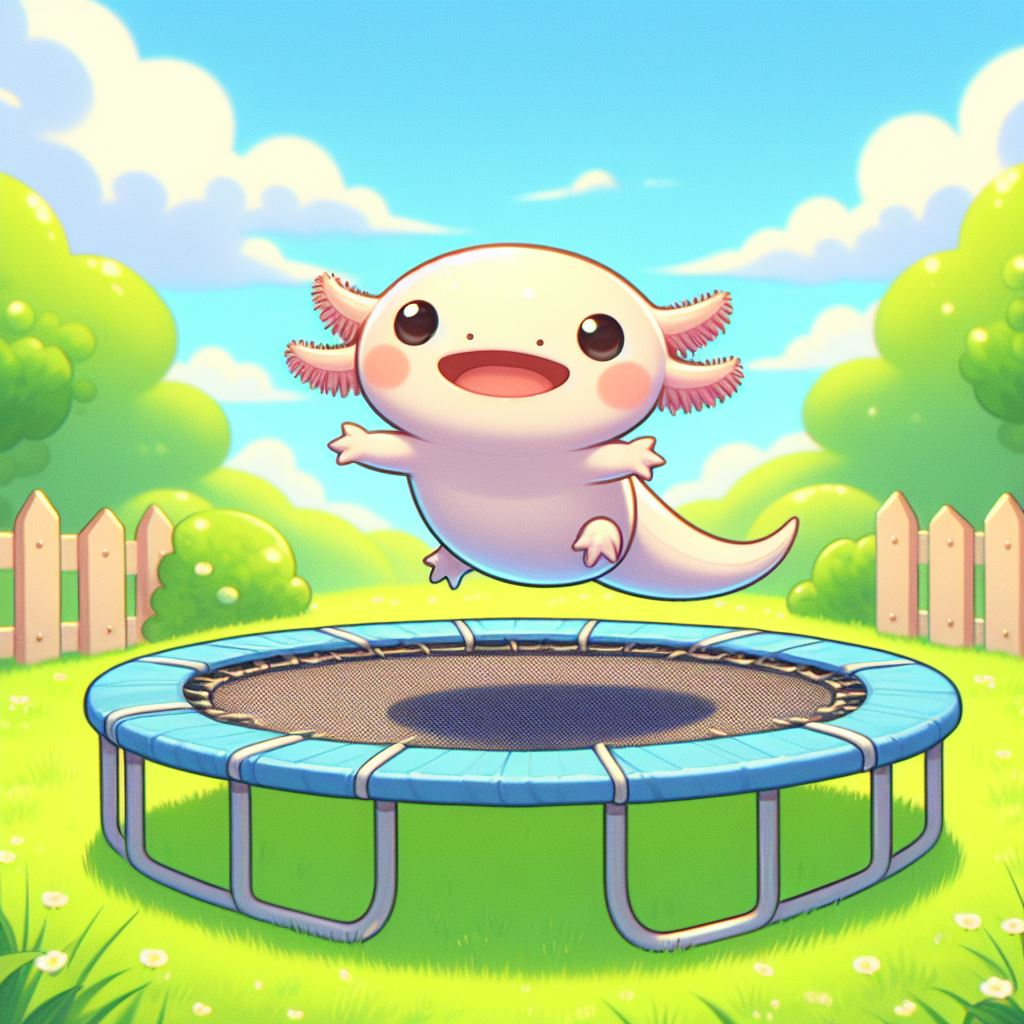

In [8]:
file_name = "1_a.jpg"
base_file = f"sample_exp_imgs/{file_name}"
base = Image.open(base_file).convert("RGB")
base_size = base.size
base_img = base.resize((768, 512))
base

In [17]:
prompt = "pikachu on a trampoline"


# generator = torch.Generator("cuda").manual_seed(42)
NUM_DIFFUSION_STEPS = 150 # number of diffusion steps
GUIDANCE_SCALE = 20 # experimented good range 15-20
STRENGTH = 0.5 # experimented good range 0.45-0.65, most good results at 0.45, 0.5, 0.55
# diffusion steps run for 0.5*num inference steps, check the source code for more details
# there is additional parameter `timesteps` in the class call 

images = ldm(prompt=prompt, image=base_img, strength=STRENGTH, guidance_scale=GUIDANCE_SCALE, 
             num_inference_steps=NUM_DIFFUSION_STEPS, generator=generator).images

100%|██████████| 75/75 [00:20<00:00,  3.69it/s]


False


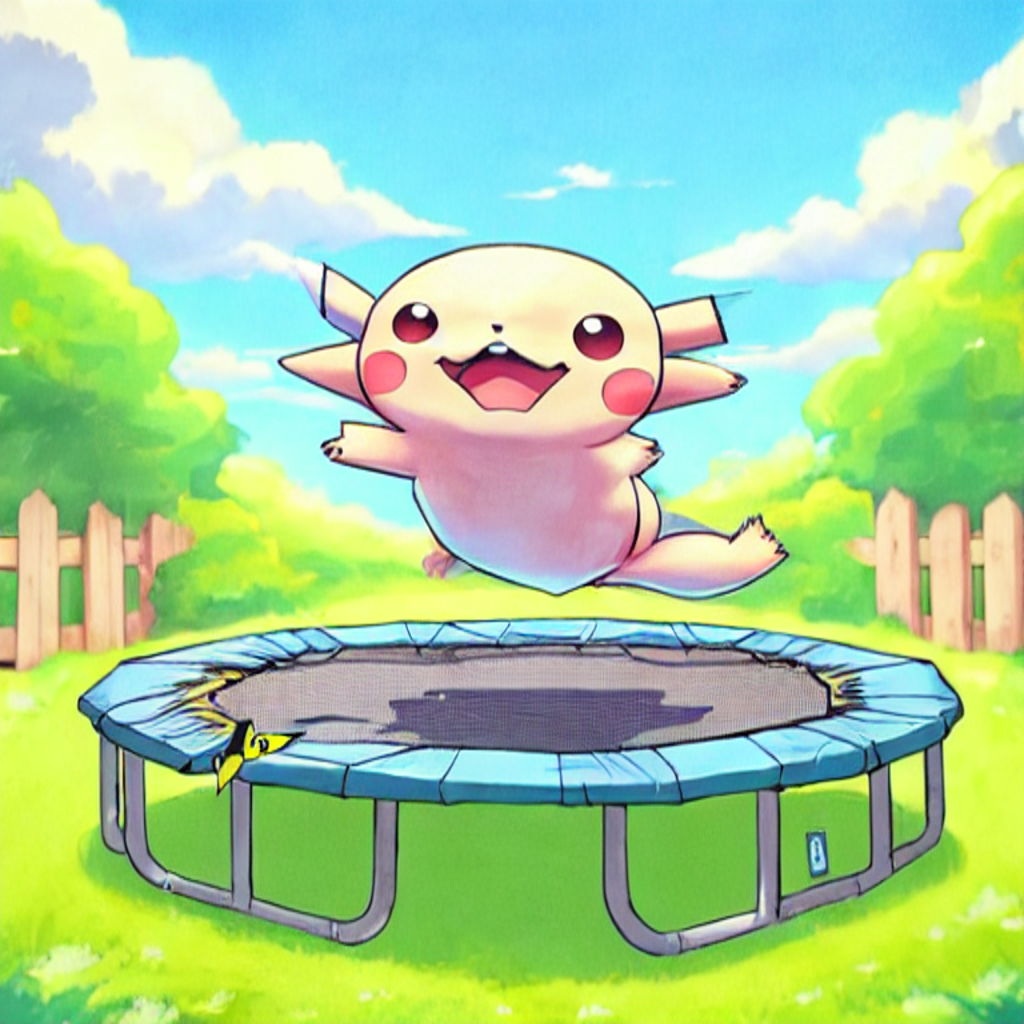

In [14]:
images[0].resize(base_size)

In [201]:
# save the image and the prompt used in a json file
# you can save the hyperparameters too if needed

images[0].resize(base_size).save(f"sample_exp_edits/{file_name}")
write_json(prompt, file_name)